In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 600

In [3]:
# Seta a visualização para não cientifica e coloca ',' como separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

# Importação das Bases de Dados

Fonte: http://www.rio.rj.gov.br/web/contasrio/dados-abertos#titulo

In [4]:
#despesa_22 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Rec_2022.csv', sep=',', encoding='latin1', decimal=',')

In [5]:
#despesa_23 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Rec_2023.csv', sep=',', encoding='latin1', decimal=',')

In [6]:
#empenho_22 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Empenhos_2023.csv', sep=';', encoding='latin1', decimal=',')

In [7]:
#empenho_23 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Empenhos_2023.csv', sep=';', encoding='latin1', decimal=',')

In [8]:
despesa_22 = pd.read_csv('data/Data_Desp_2022.csv', sep=',', encoding='latin1', decimal=',')

In [9]:
despesa_23 = pd.read_csv('data/Data_Desp_2023.csv', sep=',', encoding='latin1', decimal=',')

In [10]:

empenho_22 = pd.read_csv('data/Data_Empenhos_2022.csv', sep=';', encoding='latin1', decimal=',')

In [11]:
empenho_23 = pd.read_csv('data/Data_Empenhos_2023.csv', sep=';', encoding='latin1', decimal=',')

In [12]:
#concatena os DataFrames
despesa = pd.concat([despesa_22, despesa_23])

In [13]:
empenho = pd.concat([empenho_22, empenho_23])

# Análise das Despesas por ações de interesse

In [14]:
despesa_acao = (
    despesa
    .groupby(['Exercicio','Acao', 'Descricao_Acao', 'Elemento_Despesa',
              'Descricao_Elemento','Item_Despesa', 'Descricao_Item_Despesa'])
    .agg({
        'Orcamento_Atualizado' : 'sum',
        'Empenhado' : 'sum',
        'Liquidado' : 'sum',
    })
    .reset_index()
)

In [15]:
acoes_interesse = [4638, 2081, 2136, 2986, 2117, 2222, 2515,
                   2030, 2133, 2988, 1330, 1331, 2935, 2947,
                   2910, 2916, 1335, 2027, 1347, 2914, 3105,
                   1325, 1320, 1322, 1321, 2950, 1357, 2907]

O que saber por ação?
-Quanto foi orçado na LOA, Quanto foi empenhado e liquidado -> Tabela

-Composição do gasto por Descricao_elemento
-Se solicitado, podemos descer até Item despesa

In [16]:
acoes = [4638, 2081, 2136]
nivel = 'Elemento_Despesa'

In [17]:
def df_acao(df, acao):
    df = (
    df
    .query('Acao == @acao')
    )
    return df

In [18]:
def sumario_acao(df):
    sumario = (
        df
        .groupby(['Exercicio'])
        .agg({
            'Orcamento_Atualizado' : 'sum',
            'Empenhado' : 'sum',
            'Liquidado' : 'sum',
        })
        .reset_index()
    )
    
    return sumario

In [19]:
def itens_acao(df, nivel):
    df = (
        df
        .groupby(['Exercicio', nivel])
        .agg({
            'Orcamento_Atualizado' : 'sum',
            'Empenhado' : 'sum',
            'Liquidado' : 'sum',
        })
        .reset_index()
    )
    df = df[df['Orcamento_Atualizado']>0]
    
    #df_long = pd.melt(df, id_vars=['Exercicio','Elemento_Despesa', 'Descricao_Elemento'], value_vars=['Orcamento_Atualizado', 'Empenhado', 'Liquidado'])
    
    return df

In [20]:
def graph_itens(df,acao,nivel, figsize, label):
    sns.set_theme(style="whitegrid")
    f, ax1 = plt.subplots(figsize=figsize)
    

    #2022
    df_1 = df[df['Exercicio']==2022]

    # Plot LOA
    sns.barplot(
        data = df_1,
        x='Orcamento_Atualizado',
        y=nivel,
        label="LOA",
        color="#9B9987",
        ax=ax1)
    
    # Plot Empenhado   
    sns.barplot(
        data = df_1,
        x='Empenhado',
        y=nivel,
        label="Empenhado",
        color="#685762",
        ax=ax1)
    
    # Plot Liquidação  
    sns.barplot(
        data = df_1,
        x='Liquidado',
        y=nivel,
        label="Liquidado",
        color="#190B28",
        ax=ax1)
  
    
    
    ax1.legend(ncol=1, loc="lower right", frameon=False, bbox_to_anchor=(1.4, 0))
    ax1.set(
        ylabel="",
        xlabel=label,
    )
    ax1.tick_params(axis='both', labelsize=7,)
    ax1.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
    plt.title(f'Composicão das Despesas da ação {acao} do ano 2022', x=0)
    #plt.close()
    return f

In [21]:
# Função de análise de ação
def analise_acao(acao, nivel='Descricao_Elemento', figsize=(6,1.5), label='R$ Milhões'):
    df = df_acao(despesa_acao, acao)
    sumario = sumario_acao(df)
    df_itens = itens_acao(df, nivel)
    graph_itens(df_itens,acao, nivel, figsize, label)
    display(sumario)
    display(df_itens)
    

,Exercicio,Orcamento_Atualizado,Empenhado,Liquidado
0,2022,"93,884,644.41","91,992,925.01","89,256,317.50"
1,2023,"17,321,761.48","16,328,353.70","6,676,035.46"


,Exercicio,Descricao_Elemento,Orcamento_Atualizado,Empenhado,Liquidado
0,2022,EQUIPAMENTOS E MATERIAL PERMANENTE,"283,310.00","33,310.00","33,310.00"
1,2022,LOCACAO DE MAO-DE-OBRA,"135,000.00","135,000.00","135,000.00"
2,2022,MATERIAL DE CONSUMO,"1,351,000.00","1,119,231.35","1,119,231.35"
4,2022,OBRIGACOES TRIBUTARIAS E CONTRIBUTIVAS,"332,025.00","181,929.33","48,168.27"
5,2022,OUTROS SERVICOS DE TERCEIROS - PESSOA FISICA,"350,000.00","233,500.00","108,500.00"
6,2022,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA,"91,422,309.41","90,289,954.33","87,812,107.88"
8,2022,SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNICACAO - PESSOA JURIDICA,"11,000.00",0.00,0.00
9,2023,EQUIPAMENTOS E MATERIAL PERMANENTE,"54,690.00","48,996.00","48,996.00"
10,2023,LOCACAO DE MAO-DE-OBRA,"20,000.00",0.00,0.00
11,2023,MATERIAL DE CONSUMO,"981,700.51","613,261.08","78,490.04"


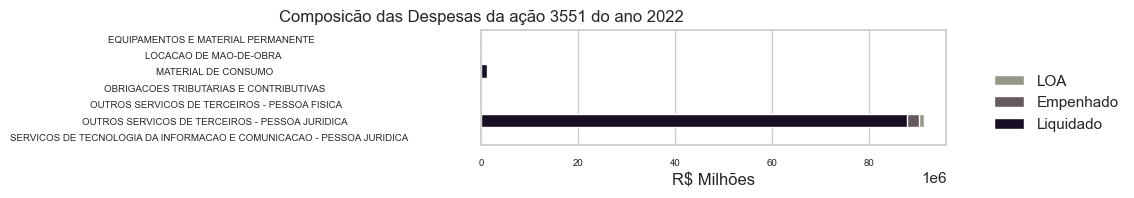

In [30]:
analise_acao(3551)

# Análise de prestadores de serviços por Orgão

In [23]:
empenho.head(2)

,Órgão executor,Descrição do órgão executor,Exercício do empenho,Número do empenho,Data do empenho,Órgão programa de trabalho,Unidade programa de trabalho,Processo do empenho,Tipo de favorecido,Código do favorecido,Favorecido,Valor empenhado,Valor liquidado,Valor pago,Programa de trabalho,Descrição do programa de trabalho,Natureza da despesa,Descrição da natureza da despesa,Fonte de recursos,Descrição da fonte de recursos,Espécie,Coletivo,Obrigação futura,Entrega imediata,Modalidade de licitação,Fundamentação legal,Tipo do instrumento contratual,Ano do instrumento contratual,Número do instrumento contratual,Situação do instrumento contratual,Início previsto do instrumento contratual,Fim previsto do instrumento contratual,Objeto do instrumento contratual,Valor do instrumento contratual,Banco pagador,Agência pagadora,Conta pagadora
0,1000,Secretaria Municipal de Governo e Integridade Pública,2022,1,02/01/2022,10,1,100058112021,PESSOA JURIDICA,"33,593,575,000,114.00",MITRA ARQUIEPISCOPAL DO RIO DE JANEIRO,"250,000.00","250,000.00","250,000.00",10.01.04.122.0389.2022,APOIO A EVENTOS E PROJETOS,33903917,"SERVICOS PARA FINS EDUCATIVOS, CULTURAIS E SOCIAIS, INCLUSIVE DIVULGACAO",100,ORDINARIOS NAO VINCULADOS,Estimativo,N,S,S,Inexigibilidade,ARTIGO 25 INCISO CAPUT DA LEI 8666 DE 21/06/93 E SUAS ALTERACOES,Contrato,"2,022.00","10,001.00",ENCERRADO,04/02/2022,01/03/2022,"REGER O PATROCÍNIO CONCEDIDO PELO MUNICÍPIO EM FAVOR DO PATROCINADO PARA REALIZAÇÃO DO PROJETO AUTO DE SÃO SEBASTIÃO, BEM COMO A EXECUÇÃO DA CONTRAPARTIDA DECORRENTE DA CONCESSÃO DO PATROCÍNIO","250,000.00",1,2234,2951983
1,1000,Secretaria Municipal de Governo e Integridade Pública,2022,2,02/01/2022,10,1,10012642019,ORGAO,"1,000.00",Secretaria Municipal de Governo e Integridade Pública,"69,997.65","69,997.65","69,997.65",10.01.04.122.0389.2169,APOIO ADMINISTRATIVO - GOVERNANCA,33903941,TAXI.RIO - USO CORPORATIVO,100,ORDINARIOS NAO VINCULADOS,Ordinario,N,N,S,Não Sujeito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,2234,2951983


In [24]:
def analise_palavra(palavra, df=empenho):
    df = df[df.apply(lambda row: row.astype(str).str.contains(palavra, case=False).any(), axis=1)]
    return df

In [25]:
def analise_executor(executor, df=empenho):
    df = df[df['Órgão executor']==executor]
    
    df = (
        df
        .groupby(['Exercício do empenho', 'Descrição do órgão executor',
                   'Órgão programa de trabalho',
                   'Descrição do programa de trabalho',
                   'Código do favorecido', 'Favorecido',
                   'Descrição da fonte de recursos',
                   'Descrição da natureza da despesa',
                   'Fundamentação legal',
                   'Objeto do instrumento contratual'])
        .agg({
            'Valor empenhado' : 'sum',
            'Valor liquidado' : 'sum',
        })
        .reset_index()
    )
    df = df[df['Valor empenhado']>0]
    df = df.sort_values(by=['Valor empenhado'], ascending=False)

    return df

In [51]:
def analise_orgao(orgao, df=empenho):
    df = df[df['Órgão programa de trabalho']==orgao]
    
    df = (
        df
        .groupby(['Exercício do empenho', 'Descrição do órgão executor',
                   'Órgão executor',
                   'Órgão programa de trabalho',
                   'Descrição do programa de trabalho',
                   'Código do favorecido', 'Favorecido',
                   'Descrição da fonte de recursos',
                   'Descrição da natureza da despesa',
                   'Fundamentação legal',
                   'Objeto do instrumento contratual'])
        .agg({
            'Valor empenhado' : 'sum',
            'Valor liquidado' : 'sum',
            'Valor pago' : 'sum',
        })
        .reset_index()
    )
    df = df[df['Valor empenhado']>0]
    df = df.sort_values(by=['Valor empenhado'], ascending=False)

    return df


In [67]:
def analise_prestadores(orgao=None, executor=None, palavra=None, df=empenho, save=False,):
    '''
    Função para analisar os prestadores de serviço.
    orgao: Órgão programa de trabalho
    executor: Órgão executor
    palavra: palavra chave para filtrar o objeto do contrato
    df: dataframe de empenho
    save: salvar o resultado em um arquivo csv
    '''
    if palavra:
        df = analise_palavra(palavra, df)

    if orgao:
        df = analise_orgao(orgao, df)
    
    if executor:
        df = analise_executor(executor, df)

    df = df.sort_values(by=['Valor empenhado'], ascending=False)
    df = df.reset_index(drop=True)
    
    if save:
        df_save = df.copy()
        df_save.to_excel(f'output/analise_prestadores_{orgao}_{palavra}.xlsx', index=False)

    return df

18 - saude
16 - educação
47 - mulheres
17 - assistencia social

In [71]:
analise_prestadores(orgao=47, save=True)

,Exercício do empenho,Descrição do órgão executor,Órgão executor,Órgão programa de trabalho,Descrição do programa de trabalho,Código do favorecido,Favorecido,Descrição da fonte de recursos,Descrição da natureza da despesa,Fundamentação legal,Objeto do instrumento contratual,Valor empenhado,Valor liquidado,Valor pago
0,2022,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHERES,"2,680,126,000,180.00",CENTRO INTEGRADO DE ESTUDOS E PROGRAMAS DE DESENVOLVIMENTO SUSTENTAVEL,ORDINARIOS NAO VINCULADOS,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIV. DIRIGIDAS A ASSIST. SOCIAL, PRESTADOS POR OSC",ARTIGO 30 INCISO III DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,"COGESTÃO TÉCNICA E ADMINISTRATIVA CASA CORA CORALINA, CEAM CHIQUINHA GONZAGA E I JUIZADP","1,711,501.40","1,711,501.40","1,711,501.40"
1,2023,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHERES,"31,315,120,000,101.00",INSTITUTO DE DESENVOLVIMENTO HUMANO DOM PIXOTE,RECURSOS NAO VINCULADOS DE IMPOSTOS,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIV. DIRIGIDAS A ASSIST. SOCIAL, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,COGESTÃO TÉCNICA E ADMINISTRATIVA DA CASA DA MULHE ELZA SOARES,"1,558,617.48","162,707.44",0.00
2,2022,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHERES,"5,364,000,000,194.00",INSTITUTO SESSUB,ORDINARIOS NAO VINCULADOS - EXERCICIOS ANTERIORES,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIV. DIRIGIDAS A ASSIST. SOCIAL, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,COGESTÃO PROGRAMA MULHERES DO RIO,"1,475,533.82","1,475,533.82","1,475,533.82"
3,2022,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHERES,"31,315,120,000,101.00",INSTITUTO DE DESENVOLVIMENTO HUMANO DOM PIXOTE,ORDINARIOS NAO VINCULADOS,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIV. DIRIGIDAS A ASSIST. SOCIAL, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,COGESTÃO TÉCNICA E ADMINISTRATIVA DAS CASAS DA MULHER CARIOCA TIA DOCA E DINAH COUTINHO,"1,286,318.13","1,286,318.13","1,286,318.13"
4,2022,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHERES,"2,539,959,000,125.00",ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS - ECOS,ORDINARIOS NAO VINCULADOS - EXERCICIOS ANTERIORES,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIV. DIRIGIDAS A ASSIST. SOCIAL, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,COGESTÃO TÉCNICA E ADMINISTRAÇÃO DO PROGRAMA MULHERES DO RIO,"1,247,738.96","1,247,738.96","1,247,738.96"
5,2023,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHERES,"5,989,476,000,382.00",GIMAVE MEIOS DE PAGAMENTOS E INFORMACOES LTDA,RECURSOS NAO VINCULADOS DE IMPOSTOS,SERVICOS DE GERENCIAMENTO,ARTIGO 1 INCISO CAPUT DA LEI 10520 DE 17/07/02 E SUAS ALTERACOES,SERVIÇO DE TRANSFERENCIA DIRETA E TEMPORÁRIA DE RECURSOS ÀS BENEFICIÁRIAS DO PROGRAMA CARTÃO MULHER CARIOCA,"1,200,000.00","96,307.00","38,423.00"
6,2022,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHERES,"5,989,476,000,382.00",GIMAVE MEIOS DE PAGAMENTOS E INFORMACOES LTDA,ORDINARIOS NAO VINCULADOS,SERVICOS DE GERENCIAMENTO,ARTIGO 1 INCISO CAPUT DA LEI 10520 DE 17/07/02 E SUAS ALTERACOES,SERVIÇO DE TRANSFERENCIA DIRETA E TEMPORÁRIA DE RECURSOS ÀS BENEFICIÁRIAS DO PROGRAMA CARTÃO MULHER CARIOCA,"1,156,682.00","1,156,682.00","1,156,682.00"
7,2023,Secretaria Especial de Políticas e Promoção da Mulher,4700,47,PREVENCAO E ENFRENTAMENTO A TODAS AS FORMAS DE VIOLENCIA CONTRA MULHE

In [29]:
empenho['Exercício do empenho'].unique()

array([2022, 2023], dtype=int64)